# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution, curve_fit
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [2]:
from sympy import cos, diff, sin, Symbol, tan

x = Symbol('x')

f = (tan(sin(x) + cos(2*x + 3)))**2
x0 = 1

df = diff(f).subs(x,x0)

print(f'производная функции {f}, в точке {x0} равна - {round(float(df), 2)}')


производная функции tan(sin(x) + cos(2*x + 3))**2, в точке 1 равна - 55.39


## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

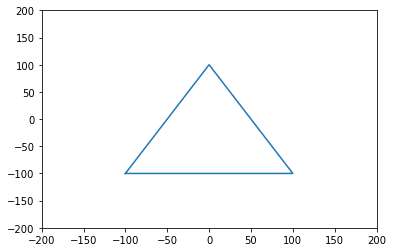

In [3]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


(-200.0, 200.0)

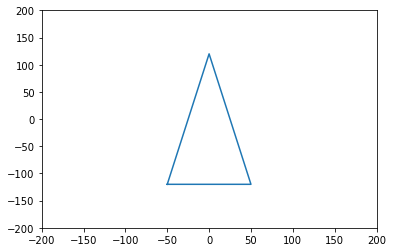

In [4]:
#Матрица масштабирования
B1 = np.array([[0.5,0,0],[0,1.2,0],[0,0,1]])
A1 = A@B1

x = A1[:,0]
y = A1[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

(-200.0, 500.0)

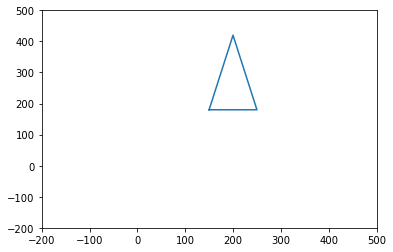

In [18]:
#матрица смещения
B2 = np.array([[200,300,0],[200,300,0],[200,300,0],[200,300,0]])
A2 = A1+B2

x = A2[:,0]
y = A2[:,1]
plt.plot(x, y)
plt.ylim([-200, 500])
plt.xlim([-200, 500]) 

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [5]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [6]:
v, S = np.linalg.eig(m)

print(f'Cобственные значения - {v}')
print(f'Cобственные векторы - {S}')

Cобственные значения - [ 3. -1.]
Cобственные векторы - [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [7]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [8]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

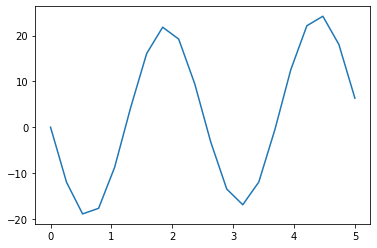

In [9]:
plt.plot(x, fx)
plt.show()

In [10]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [11]:
bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(error, bounds, seed=42)
result

     fun: 1.5130289208187264e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

In [12]:
error(result.x)

1.5130289208187264e-06

In [13]:
a = result.x[0]
b = result.x[1]
print(f' оптимальные параметры a, b - {round(a, 2), round(b, 2)}')

 оптимальные параметры a, b - (3.0, -2.5)


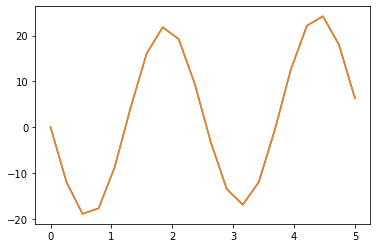

In [15]:
plt.plot(x, fx)
plt.plot(x, f(x, a, b))
plt.show()

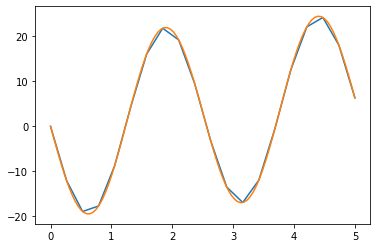

In [16]:
plt.plot(x, fx)
x_ = np.linspace(0, 5, 100)
plt.plot(x_, f(x_, a, b))
plt.show()

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [17]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [18]:
users_number = len(raitings)
users_number

10

In [19]:
# создам матрице 10х10 попарных значений косинусов угла между векторами

cos_raitings = np.empty((users_number,users_number), dtype="object")

for user_i, raiting_i in enumerate(raitings):
    cos_i = []
    for user_j, rating_j in enumerate(raitings):
        
        cos_j = np.dot(raiting_i, rating_j) / (np.linalg.norm(raiting_i) * np.linalg.norm(rating_j))
        cos_i.append(cos_j)
        
    cos_raitings[user_i] = cos_i

cos_raitings

array([[1.0, 0.8260291914926011, 0.8492152913329328, 0.7834011593236074,
        0.8191763207928605, 0.7411854787309532, 0.7273582830552573,
        0.8096752188740591, 0.9106598233573044, 0.8601077572660832],
       [0.8260291914926011, 1.0, 0.8123432494307796, 0.8463533715492267,
        0.8713805223930228, 0.8271310743150353, 0.8262968404756843,
        0.8002600269984134, 0.8252630791081776, 0.8196812673341947],
       [0.8492152913329328, 0.8123432494307796, 1.0, 0.8466937399285854,
        0.7839429872916631, 0.7909798532223776, 0.6761622283340306,
        0.7628955209443427, 0.8211207737697991, 0.9187305147356807],
       [0.7834011593236074, 0.8463533715492267, 0.8466937399285854,
        0.9999999999999999, 0.6915340887233647, 0.7866579187986692,
        0.832742107055763, 0.8293466659451719, 0.7770665979363705,
        0.8588686958710952],
       [0.8191763207928605, 0.8713805223930228, 0.7839429872916631,
        0.6915340887233647, 0.9999999999999998, 0.7764434024380763,
  

In [20]:
# ищу максимальное значение косинуса, и записываю в словарь попарно векторы с максимальным косинусом

pares = {}
for i in range(users_number):
    min_cos = min(cos_raitings[i])

    for j, cos_j in enumerate(cos_raitings[i]):
    
        if (min_cos <= cos_j) and (i != j):
            min_cos = cos_j
            pares[i] = j
    print(f'Пользователь {i}, больше всего похож на пользователя {pares[i]}')   
    print(f'косинусная мера {min_cos}')
pares

Пользователь 0, больше всего похож на пользователя 8
косинусная мера 0.9106598233573044
Пользователь 1, больше всего похож на пользователя 4
косинусная мера 0.8713805223930228
Пользователь 2, больше всего похож на пользователя 9
косинусная мера 0.9187305147356807
Пользователь 3, больше всего похож на пользователя 9
косинусная мера 0.8588686958710952
Пользователь 4, больше всего похож на пользователя 8
косинусная мера 0.8794847716076252
Пользователь 5, больше всего похож на пользователя 9
косинусная мера 0.8551490764118892
Пользователь 6, больше всего похож на пользователя 3
косинусная мера 0.832742107055763
Пользователь 7, больше всего похож на пользователя 5
косинусная мера 0.8445168512565341
Пользователь 8, больше всего похож на пользователя 0
косинусная мера 0.9106598233573044
Пользователь 9, больше всего похож на пользователя 2
косинусная мера 0.9187305147356807


{0: 8, 1: 4, 2: 9, 3: 9, 4: 8, 5: 9, 6: 3, 7: 5, 8: 0, 9: 2}